# Quick start

In [8]:
import rectanglepy as rectangle
import pandas as pd
from anndata import AnnData, read_h5ad

## Creating the input data

Rectangle requires the single-cell data in the form of a scverse [`AnnData`](https://anndata.readthedocs.io/en/latest/) object, and the bulk data as a pandas DataFrame.

Do see an example of this, we can load the tutorial data provided by Rectangle.

In [2]:
sc_counts, annotations, bulks  = rectangle.load_tutorial_data()

The tutorial data set contains single-cell RNA-seq counts as a pandas DataFrame, with the cell type annotations as a pandas Series.

In [3]:
sc_counts.iloc[:, :5].head()

,MIR1302-2HG,AL627309.1,AL627309.4,AC114498.1,AL669831.5
E2L4_GATGCTACAGGCACAA,0,0,0,0,0
L5_AACAACCAGGAACTAT,0,0,0,0,0
L5_TCCTTCTGTACTCCGG,0,0,0,0,0
L2_GCCCGAACACGTATAC,0,0,0,0,0
E2L2_ATGCATGTCACACCCT,0,0,0,0,0


In [12]:
annotations.head()

E2L4_GATGCTACAGGCACAA    Monocytes
L5_AACAACCAGGAACTAT      Monocytes
L5_TCCTTCTGTACTCCGG      Monocytes
L2_GCCCGAACACGTATAC      Monocytes
E2L2_ATGCATGTCACACCCT    Monocytes
Name: 0, dtype: object

In [13]:
bulks.T.head()

,pbmc_1,pbmc_10,pbmc_12
UBE2Q2P2,0.000000,0.081115,0.000000
SSX9,0.000000,0.000000,0.000000
CXorf67,0.118865,0.086782,0.188464
EFCAB8,0.000000,0.000000,0.031570
SPATA31B1P,0.000000,0.000000,0.000000


The count dataframe with it's annotations can easily convert to an AnnData object.


In [4]:
sc_adata = AnnData(sc_counts, obs=annotations.to_frame(name="cell_type"))

## Single step Rectangle workflow

To deconvolute the bulk data in a single step, use the "rectangle" method. This method returns a tuple of the estimated cell type proportions and the signature result.

In [ ]:
estimations, signature_result = rectangle.rectangle(sc_adata, bulks)

The rectangle method returns two objects:
1. `estimations`: a pandas DataFrame with the estimated cell type proportions for each bulk sample.
2. `signature_result`: a [`RectangleSignatureResult`](../generated/rectanglepy.pp.RectangleSignatureResult.rst) object containing  additional information about the signature and the unknown content.


In [6]:
estimations

,B cells,ILC,Monocytes,NK cells,Plasma cells,Platelet,T cells CD4 conv,T cells CD8,Tregs,mDC,pDC,Unknown
pbmc_1,0.090739,0.011386,0.229843,0.022667,0.005956,0.004898,2.833039e-02,0.162392,0.416964,0.024425,0.002401,0.000000
pbmc_10,0.110518,0.016910,0.297931,0.016344,0.000659,0.021996,8.220139e-18,0.118382,0.391830,0.020750,0.004678,0.000000
pbmc_12,0.071532,0.007335,0.225517,0.101075,0.003095,0.018637,0.000000e+00,0.275009,0.256503,0.010054,0.002985,0.028258


In [7]:
signature_result

## 2-step Rectangle workflow

Rectangle can also be run in two steps, first creating the signature and then deconvoluting the bulk data.

**1. Create Signature result**

In [ ]:
signature_result = rectangle.pp.build_rectangle_signatures(sc_adata, bulks=bulks)

This creates a [`RectangleSignatureResult`](../generated/rectanglepy.pp.RectangleSignatureResult.rst) object.

**2. Deconvolute bulk data**

We can then use the signature result to deconvolute the bulk data. This is done using the `deconvolution` method of the `RectangleSignatureResult` object.

In [ ]:
estimations, _ = rectangle.tl.deconvolution(signature_result, bulks)

This returns a pandas DataFrame with the estimated cell type proportions.

In [12]:
estimations

,B cells,ILC,Monocytes,NK cells,Plasma cells,Platelet,T cells CD4 conv,T cells CD8,Tregs,mDC,pDC,Unknown
pbmc_1,0.090739,0.011386,0.229843,0.022667,0.005956,0.004898,2.833039e-02,0.162392,0.416964,0.024425,0.002401,0.000000
pbmc_10,0.110518,0.016910,0.297931,0.016344,0.000659,0.021996,8.220139e-18,0.118382,0.391830,0.020750,0.004678,0.000000
pbmc_12,0.071532,0.007335,0.225517,0.101075,0.003095,0.018637,0.000000e+00,0.275009,0.256503,0.010054,0.002985,0.028258


# Bulk RNA-seq deconvolution

Let us now see how we can use Rectangle to deconvolute bulk RNA-seq data.
For the Bulk RNA-seq data, we will use the [Finotello](https://figshare.com/articles/dataset/Validation_real/25347757?file=44877523) dataset:

*Finotello, F. et al. Molecular and pharmacological modulators of the tumor immune contexture revealed by deconvolution of RNA-seq data. Genome Med. 11, 34 (2019)*

In [5]:
bulks_fino = pd.read_csv("../data/bulks_finotello_tpm.csv", index_col=0)
bulks_fino.head()

,pbmc_1,pbmc_10,pbmc_12,pbmc_2,pbmc_4,pbmc_5,pbmc_6,pbmc_7,pbmc_9
UBE2Q2P2,0.000000,0.081115,0.000000,0.000000,0.059691,0.613015,0.0,0.000000,0.000000
SSX9,0.000000,0.000000,0.000000,0.000000,0.212565,0.000000,0.0,0.000000,0.000000
CXorf67,0.118865,0.086782,0.188464,0.094006,0.496705,0.196090,0.0,0.165406,0.157926
EFCAB8,0.000000,0.000000,0.031570,0.004499,0.346400,0.385828,0.0,0.048187,0.041571
SPATA31B1P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


For the single-cell data, we select a [subset](https://figshare.com/articles/dataset/Training_sc/25348051?file=56063936) of the Hao CITE-seq single-cell dataset from human peripheral blood mononuclear cells (PBMC):

*Hao Y, Hao S, Andersen-Nissen E, Mauck WM 3rd, Zheng S, Butler A, et al. Integrated analysis of multimodal single-cell data. Cell. 2021;184:3573–87.e29.*

In [11]:
haoSub_adata = read_h5ad("../data/haoSub_adata.h5ad")
haoSub_adata

AnnData object with n_obs × n_vars = 14744 × 24049
    obs: 'cell_type'

We can use the `rectangle` method to deconvolute the bulk data using the single-cell data.

In [ ]:
estimations, signature_result = rectangle.rectangle(haoSub_adata, bulks_fino.T)

In [18]:
estimations

,B cells,ILC,Monocytes,NK cells,Plasma cells,Platelet,T cells CD4 conv,T cells CD8,Tregs,mDC,pDC,Unknown
pbmc_1,0.029346,3.390053e-03,0.295815,0.045174,0.013283,0.004714,0.438209,0.098777,1.427274e-02,0.055320,0.001699,0.000000
pbmc_10,0.034419,1.992208e-03,0.407427,0.044949,0.002626,0.020989,0.369597,0.030068,2.053319e-02,0.064677,0.002723,0.000000
pbmc_12,0.026350,4.836118e-03,0.319415,0.129382,0.005883,0.016502,0.183151,0.270114,8.240905e-03,0.034004,0.002121,0.000000
pbmc_2,0.029448,5.711324e-04,0.291199,0.072062,0.011155,0.010073,0.352357,0.068854,1.451476e-02,0.024528,0.006237,0.119002
pbmc_4,0.050013,2.297419e-03,0.239022,0.124765,0.001046,0.015142,0.264233,0.268998,3.186824e-19,0.028826,0.005658,0.000000
pbmc_5,0.059392,-5.751313e-19,0.373988,0.106598,0.001633,0.006758,0.100756,0.289162,5.628521e-18,0.052537,0.009176,0.000000
pbmc_6,0.039614,2.101053e-19,0.404218,0.083012,0.041846,0.016454,0.156398,0.164760,2.070467e-02,0.029317,0.003369,0.040309
pbmc_7,0.015631,7.299458e-03,0.302166,0.168512,0.004204,0.012020,0.093633,0.313262,2.961426e-18,0.067666,0.006569,0.009038
pbmc_9,0.012117,1.835602e-03,0.390529,0.162322,0.007402,0.017979,0.131395,0.156392,1.489703e-02,0.031738,0.004453,0.068939


<Axes: title={'center': 'Estimated cell type proportions for first bulk sample'}, xlabel='Cell type', ylabel='Proportion'>

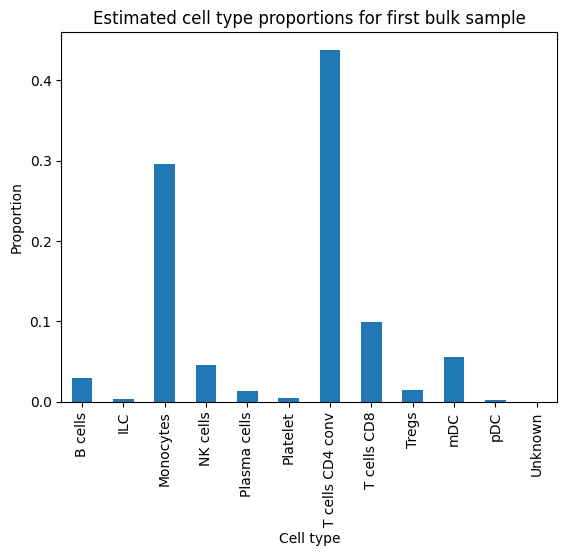

In [22]:
estimations.iloc[0].plot(kind='bar',
                         title='Estimated cell type proportions for first bulk sample',
                         ylabel='Proportion',
                         xlabel='Cell type'
                         )

# Spatial transcriptomics deconvolution

To see how Rectangle can be used with spatial data, we can load a remote dataset using the `spatialdata` package.
See the [spatialdata documentation](https://spatialdata.scverse.org/en/stable/index.html) for more details.

We use the [10x Visium data generated from the human dorsolateral prefrontal cortex](https://github.com/LieberInstitute/HumanPilot/tree/master/10X/151673)

Which can be dowloaded from here:
[https://spatial-dlpfc.s3.us-east-2.amazonaws.com/h5/151673_filtered_feature_bc_matrix.h5](https://spatial-dlpfc.s3.us-east-2.amazonaws.com/h5/151673_filtered_feature_bc_matrix.h5)

In [ ]:
import spatialdata
import spatialdata_io

s_data = spatialdata_io.visium(path='../data', dataset_id='151673',scalefactors_file='scalefactors_json.json', tissue_positions_file='tissue_positions.csv', counts_file='151673_filtered_feature_bc_matrix.h5')


 To build the signature we will load the [M1 Allen Brain atlas](https://portal.brain-map.org/atlases-and-data/rnaseq/human-m1-10x)

In [ ]:
counts = pd.read_csv('../data/human_m1/matrix.csv', index_col=0)
counts = counts.astype(int)
metadata = pd.read_csv('../data/human_m1/metadata.csv', index_col=0)
annotations = metadata['cell_type_alias_label']


We do a simple preprocessing of the annotations to group the cell types into broader categories.

In [ ]:
# remove anything after the second space(word)
annotations = annotations.str.split(' ', n=2).str[:2].str.join(' ')
# remove anything afert first minus
annotations = annotations.str.split('-', n=1).str[0]

We can run Rectangle on the spatial data using the `rectangle` method, by using the 'table' object of the `SpatialData` object.

In [ ]:
adata = AnnData(counts, obs=annotations.to_frame(name='cell_type'))

data_table = s_data['table']
bulks = data_table.to_df()
# Convert bulks from counts to CPM
bulks_cpm = bulks.div(bulks.sum(axis=1), axis=0) * 1e6


In [ ]:
estimations, signature_result = rectangle.rectangle(adata, bulks_cpm)


We can annotate the spatial data with the estimations by creating a new `AnnData` object from the estimations and adding it to the `SpatialData` object.

In [ ]:
from spatialdata.models import TableModel

table_data = AnnData(estimations)
adata_for_sdata = TableModel.parse(table_data)

adata_for_sdata.uns["spatialdata_attrs"] = {
    "region": "spots",
    "region_key": "region",
    "instance_key": "spot_id",
}

adata_for_sdata.obs["region"] = pd.Categorical(["spots"] * len(adata_for_sdata))
adata_for_sdata.obs["spot_id"] = s_data.tables.data['table'].obs["spot_id"]

s_data.tables["rectangle_results"] = adata_for_sdata